<font face="Times New Roman" size=5>
<div dir=rtl align="center">
<font face="Times New Roman" size=5>
In The Name of God
</font>
<br>
<img src="https://logoyar.com/content/wp-content/uploads/2021/04/sharif-university-logo.png" alt="University Logo" width="150" height="150">
<br>
<font face="Times New Roman" size=4 align=center>
Sharif University of Technology - Department of Electrical Engineering
</font>
<br>
<font color="#008080" size=6>
Deep Learning
</font>
<hr/>
<font color="#800080" size=5>
Assignment 1 : Introduction to Machine Learning
<br>
</font>
<font size=5>
Instructor: Dr. M. Bejani
<br>
</font>
<font size=4>
Spring 2025
<br>
</font>
<font face="Times New Roman" size=4>
Deadline: TBD
</font>
<hr>
<font color='red'  size=4>
Note: It is highly recommended to run your notebook on Google Colab or Kaggle
<br>
</font>
<font face="Times New Roman" size=4 align=center>

</font>
<br>
<hr>
</div></font>

In this part we are going to use Restricterd Boltzman Machine(RBM) in practice, So we first impliment the class of RBM and then load the MNIST datset witch is very famous dataset and mainly used for education purposes and then train the RBM model on it

In [ ]:
Name = "MohammadParsa Dini"
StudentId = "400101204"

In [ ]:
# Here we need to import the libraries that we are going to use
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt
import numpy as np

import torch.utils.data
from torchvision import datasets, transforms
from torchvision.utils import make_grid

if torch.cuda.is_available():
    torch.device = 'cuda'
else:
    torch.device = 'cpu'

print(torch.device)

cuda


# define RBM class
here base on what you had learned in the class, impliment the RBM class, then we are going to instanciate this class for the training.


In RBM, the energy function is defined as
$$
E(x, h) = -a^\top x - b^\top h - x^\top W h \,.
$$

To make RBM as an energy-based model, the free energy function is computed as follows:

$$
\begin{align}
F(x) &= -\log \sum_h \exp (-E(x, h)) \\
     &= -a^\top x - \sum_j \log (1 + \exp(W^{\top}_jx + b_j))\,.
\end{align}
$$


In [ ]:
class RBM(nn.Module):
    r"""Restricted Boltzmann Machine class.

    Args:
        n_vis (int, optional): The size of visible layer.
        the value of this parameter deponds on the shape of your dataset(here MNIST dataset)

        n_hid (int, optional): The size of hidden layer.
        the value of this parameter can be what ever you desire(should be less than n_vis)

        k (int, optional): The number of Gibbs sampling. Defaults to 1(for simplicity).
    """
    def __init__(self, n_vis, n_hid, k=5):  # Increased k for better sampling
        """Create an RBM."""
        super(RBM, self).__init__()
        self.v_bias = nn.Parameter(torch.zeros(n_vis))
        self.h_bias = nn.Parameter(torch.zeros(n_hid))
        self.W = nn.Parameter(torch.randn(n_vis, n_hid) * 0.1)  # Larger weight initialization
        self.k = k

    def visible_to_hidden(self, v):
      r"""
        Args:
            v (Tensor): The visible variable.

        Returns:
            Tensor: The hidden variable.
        """
        # p(h|v)
        p_h = torch.sigmoid(F.linear(v, self.W.t(), self.h_bias))
        return p_h

    def hidden_to_visible(self, h):
      r"""
        Args:
            h (Tendor): The hidden variable.

        Returns:
            Tensor: The visible variable.
        """
        # p(v|h)
        p_v = torch.sigmoid(F.linear(h, self.W, self.v_bias))
        return p_v

    def free_energy(self, v):
        r"""
        Args:
            v (Tensor): The visible variable.

        Returns:
            FloatTensor: The free energy value.

        """
        v_term = torch.matmul(v, self.v_bias)
        h_term = torch.sum(F.softplus(F.linear(v, self.W.t(), self.h_bias)), dim=1)
        return -v_term - h_term

    def forward(self, v):
      r"""
        Args:
            v (Tensor): The visible variable.

        Returns:
            (Tensor, Tensor): The real and generagted variables.
        """
        #TODO
        v_gibb = v
        for _ in range(self.k):
            h_prob = self.visible_to_hidden(v_gibb)
            h_sample = torch.bernoulli(h_prob)  # Sample binary hidden units
            v_prob = self.hidden_to_visible(h_sample)
            v_gibb = torch.bernoulli(v_prob)  # Sample binary visible units
        return v, v_gibb

    def sample(self, num_samples, steps=1000, device='cpu'):
        """Generate samples from the RBM by Gibbs sampling."""
        v = torch.rand(num_samples, self.v_bias.size(0)).to(device)
        for _ in range(steps):
            h_prob = self.visible_to_hidden(v)
            h_sample = torch.bernoulli(h_prob)
            v_prob = self.hidden_to_visible(h_sample)
            v = torch.bernoulli(v_prob)
        return v


In [ ]:
class RBM(nn.Module):
    r"""Restricted Boltzmann Machine class.

    Args:
        n_vis (int, optional): The size of visible layer.
        the value of this parameter deponds on the shape of your dataset(here MNIST dataset)

        n_hid (int, optional): The size of hidden layer.
        the value of this parameter can be what ever you desire(should be less than n_vis)

        k (int, optional): The number of Gibbs sampling. Defaults to 1(for simplicity).
    """

    def __init__(self, n_vis, n_hid, k=1):
        """Create a RBM."""
        super(RBM, self).__init__()
        self.v = nn.Parameter(torch.zeros(n_vis))
        self.h = nn.Parameter(torch.zeros(n_hid))
        self.W = nn.Parameter(torch.randn(n_vis,n_hid) * 0.01)
        self.k = k

    def visible_to_hidden(self, v):
        r"""
        Args:
            v (Tensor): The visible variable.

        Returns:
            Tensor: The hidden variable.
        """
        # p(h|v)
        #p = torch.sigmoid(F.linear(v, self.W, self.h))
        p = torch.sigmoid(F.linear(v, self.W.t(), self.h))

        return p#.bernoulli()

    def hidden_to_visible(self, h):
        r"""
        Args:
            h (Tendor): The hidden variable.

        Returns:
            Tensor: The visible variable.
        """
        # p(v|h)
        p = torch.sigmoid(F.linear(h, self.W, self.v))
        return p#.bernoulli()

    def free_energy(self, v):
        r"""
        Args:
            v (Tensor): The visible variable.

        Returns:
            FloatTensor: The free energy value.

        """
        v_term = torch.matmul(v, self.v)
        h_term = torch.sum(F.softplus(F.linear(v, self.W.t(), self.h)), dim=1)
        return -v_term - h_term


    def forward(self, v):
        r"""
        Args:
            v (Tensor): The visible variable.

        Returns:
            (Tensor, Tensor): The real and generagted variables.
        """

        #TODO
        v_gibb = v
        for _ in range(self.k):
            h_prob = self.visible_to_hidden(v_gibb)
            h_sample = torch.bernoulli(h_prob)
            v_prob = self.hidden_to_visible(h_sample)
            v_gibb = torch.bernoulli(v_prob)
        return v, v_gibb

In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Load MNIST and binarize
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: torch.bernoulli(x))  # stochastic binarization
])

mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
loader = DataLoader(mnist, batch_size=64, shuffle=True)

# Instantiate model
rbm = RBM(n_vis=28*28, n_hid=128, k=1)
optimizer = torch.optim.SGD(rbm.parameters(), lr=0.1)

# Training
for epoch in range(5):
    epoch_loss = 0
    for batch, _ in loader:
        batch = batch.view(-1, 28*28)  # flatten
        loss = rbm.cd_loss(batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}")


100%|██████████| 9.91M/9.91M [00:00<00:00, 16.1MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 485kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.89MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.82MB/s]


Epoch 1, Loss: -15080.4243
Epoch 2, Loss: -10410.2783
Epoch 3, Loss: -8624.2011
Epoch 4, Loss: -7498.0604
Epoch 5, Loss: -6516.2776


now that we impliment the RBM class, we need to train it, to do so impliment the following function for the training

In [ ]:
def train(model, train_loader, n_epochs=20, lr=0.01):
    r"""
    Args:
        model: The model.
        train_loader (DataLoader): The data loader.
        n_epochs (int, optional): The number of epochs. Defaults to 20.
        lr (Float, optional): The learning rate. Defaults to 0.01.

    Returns:
        The trained model.

    """
    # define the optimizer. you can use Adam
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    model.train()

    for epoch in range(n_epochs):
        loss_list = []
        for _, (data, target) in enumerate(train_loader):
            v = data.view(-1, 784)
            v, v_gibbs = model(v)
            # calculate loss and append it "loss" list in order to observe training
            loss = torch.mean(model.free_energy(v) - model.free_energy(v_gibbs))
            loss_list.append(loss.item())

            # optimize the model base on the loss
            # TODO
            optimizer.zero_grad()
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()

        print('Epoch %d\t Loss=%.4f' % (epoch, np.mean(loss_list)))

    return model

In [ ]:
# in order to show the generated images, use following function
def show_and_save(img, file_name):
    r"""
    Args:
        img (Tensor): The image.
        file_name (Str): The destination.
    """
    np_img = np.transpose(img.numpy(), (1, 2, 0))
    f = "./%s.png" % file_name
    plt.imshow(np_img, cmap='gray')
    plt.imsave(f, np_img)

In [ ]:
# for the training, we need to set some hyperparameters value,
# choose whatever you want, in order to get a solid results
batch_size = 64 # you can change this but for better display, do not
n_epochs = 20
lr = 0.0001
n_hid = 128
n_vis = 784

In [ ]:
# create an RBM model
model = RBM(n_vis,n_hid,1)

In [ ]:
# now we crete the model, we need a dataset,
# so load MNIST dataset here using "torch.utils.data.DataLoader"


#train_loader = ...

import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define transformations for the dataset (e.g., normalize images)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to range [-1, 1]
])

# Download and load the MNIST training dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Create DataLoader for the training dataset
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)


In [ ]:
# now train the model
import time
start_time = time.time()
trained_model = train(model, train_loader, n_epochs=n_epochs, lr=lr)


end_time = time.time()
print(f"Cell execution time: {end_time - start_time:.2f} seconds")

Epoch 0	 Loss=-34629.6174
Epoch 1	 Loss=-104214.4048
Epoch 2	 Loss=-173821.6090
Epoch 3	 Loss=-243425.2166
Epoch 4	 Loss=-313021.8205
Epoch 5	 Loss=-382614.0212
Epoch 6	 Loss=-452213.9877
Epoch 7	 Loss=-521815.4601
Epoch 8	 Loss=-591426.2192
Epoch 9	 Loss=-661017.2577
Epoch 10	 Loss=-730643.2050
Epoch 11	 Loss=-800252.4269
Epoch 12	 Loss=-869849.3410
Epoch 13	 Loss=-939465.4276
Epoch 14	 Loss=-1009072.2189
Epoch 15	 Loss=-1078703.8881
Epoch 16	 Loss=-1148314.5706
Epoch 17	 Loss=-1217890.2737
Epoch 18	 Loss=-1287487.7922
Epoch 19	 Loss=-1357071.0514
Epoch 20	 Loss=-1426674.3598
Epoch 21	 Loss=-1496250.4083
Epoch 22	 Loss=-1565839.3208
Epoch 23	 Loss=-1635423.0364
Epoch 24	 Loss=-1705026.7681
Epoch 25	 Loss=-1774577.6868
Epoch 26	 Loss=-1844201.4800
Epoch 27	 Loss=-1913811.7988
Epoch 28	 Loss=-1983327.7608
Epoch 29	 Loss=-2052956.1437
Cell execution time: 1108.73 seconds


In [ ]:
# now train the model
trained_model = train(model, train_loader, n_epochs=n_epochs, lr=lr)

Epoch 0	 Loss=44.6893
Epoch 1	 Loss=-0.1198
Epoch 2	 Loss=-0.0477
Epoch 3	 Loss=0.3916
Epoch 4	 Loss=0.5956
Epoch 5	 Loss=0.7173
Epoch 6	 Loss=1.0595
Epoch 7	 Loss=1.2956
Epoch 8	 Loss=1.3640
Epoch 9	 Loss=1.4601


here for showing how the model works, load images from "train_loader" and then feed it to the model, show real images and generated images

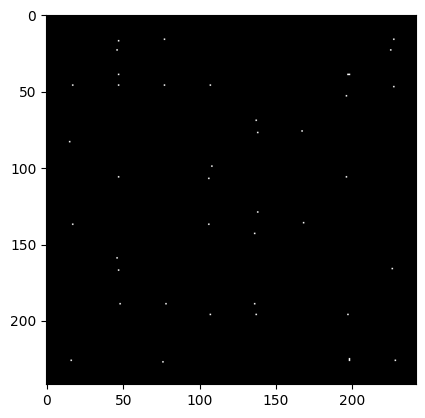

In [ ]:
import os
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

# Create the output directory if it doesn't exist
output_dir = './output/'
os.makedirs(output_dir, exist_ok=True)

# Load a batch of images from the train_loader
batch = next(iter(train_loader))
real_images, _ = batch  # Extract the images (labels are not needed)

# Flatten the real images for the RBM model
real_images_flat = real_images.view(-1, 784)

# Pass the images through the model
v, v_gibbs = model(real_images_flat)

# Ensure values are in the valid range [0, 1]
v = torch.clamp(v, min=0, max=1)
v_gibbs = torch.clamp(v_gibbs, min=0, max=1)

# Convert and save real images
real_image_grid = make_grid(v.view(batch_size, 1, 28, 28).detach())
show_and_save(real_image_grid, os.path.join(output_dir, 'real'))

# Convert and save generated images
generated_image_grid = make_grid(v_gibbs.view(batch_size, 1, 28, 28).detach())
show_and_save(generated_image_grid, os.path.join(output_dir, 'generated'))


In [ ]:
images = ...
v, v_gibbs = model(...)

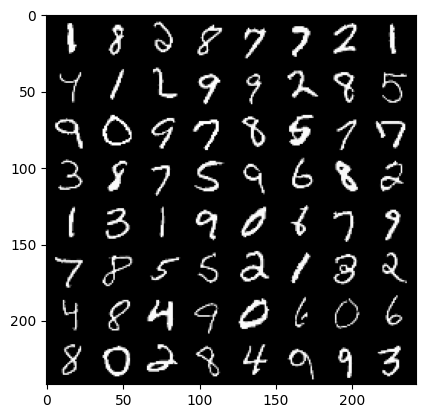

In [ ]:
#show the real images
show_and_save(make_grid(v.view(batch_size, 1, 28, 28).data), 'output/real')

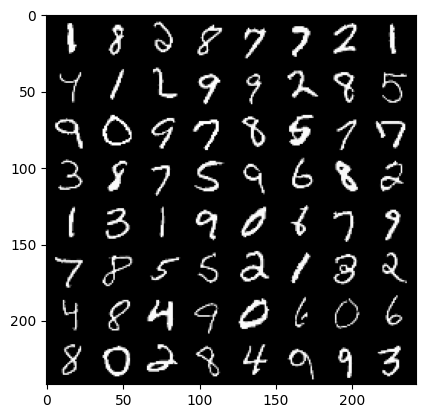

In [ ]:
#show the real images
show_and_save(make_grid(v.view(batch_size, 1, 28, 28).data), 'output/real')

In [ ]:
# show the generated images
show_and_save(make_grid(v_gibbs.view(batch_size, 1, 28, 28).data), 'output/fake')

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

class RBM(nn.Module):
    def __init__(self, n_vis, n_hid, k=1):
        super(RBM, self).__init__()
        self.v_bias = nn.Parameter(torch.zeros(n_vis))
        self.h_bias = nn.Parameter(torch.zeros(n_hid))
        self.W = nn.Parameter(torch.randn(n_vis, n_hid) * 0.01)
        self.k = k

    def visible_to_hidden(self, v):
        p_h = torch.sigmoid(F.linear(v, self.W.t(), self.h_bias))
        return p_h

    def hidden_to_visible(self, h):
        p_v = torch.sigmoid(F.linear(h, self.W, self.v_bias))
        return p_v

    def free_energy(self, v):
        v_term = torch.matmul(v, self.v_bias)
        h_term = torch.sum(F.softplus(F.linear(v, self.W.t(), self.h_bias)), dim=1)
        return -v_term - h_term

    def forward(self, v):
        v_gibb = v
        for _ in range(self.k):
            h_prob = self.visible_to_hidden(v_gibb)
            h_sample = torch.bernoulli(h_prob)
            v_prob = self.hidden_to_visible(h_sample)
            v_gibb = v_prob  # Use probabilities for now
        return v, v_gibb

def train(model, train_loader, n_epochs=20, lr=0.0001):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    model.train()

    for epoch in range(n_epochs):
        loss_list = []
        for batch_idx, (data, _) in enumerate(train_loader):
            v = data.view(-1, 784)
            v = (v > 0.5).float()  # Binarize
            v, v_gibbs = model(v)
            loss = torch.mean(model.free_energy(v) - model.free_energy(v_gibbs))
            loss_list.append(loss.item())

            optimizer.zero_grad()
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()

            # Visualize first batch of each epoch
            if batch_idx == 0:
                show_and_save(make_grid(v.view(batch_size, 1, 28, 28).data), f'output/real_epoch_{epoch}')
                show_and_save(make_grid(v_gibbs.view(batch_size, 1, 28, 28).data), f'output/fake_epoch_{epoch}')

        print(f'Epoch {epoch}\t Loss={np.mean(loss_list):.4f}')
    return model

def show_and_save(img, file_name):
    np_img = np.transpose(img.numpy(), (1, 2, 0))
    f = f"./{file_name}.png"
    plt.imshow(np_img, cmap='gray')
    plt.imsave(f, np_img)
    plt.close()  # Close figure to avoid memory issues

# Hyperparameters
batch_size = 64
n_epochs = 20
lr = 0.0001
n_hid = 128
n_vis = 784

# Load MNIST
train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Train model
model = RBM(n_vis, n_hid, k=1)
model = train(model, train_loader, n_epochs, lr)

Epoch 0	 Loss=-83.9444
Epoch 1	 Loss=-111.4246
Epoch 2	 Loss=-130.0733
Epoch 3	 Loss=-142.2248
Epoch 4	 Loss=-151.9194
Epoch 5	 Loss=-159.5897
Epoch 6	 Loss=-165.5632
Epoch 7	 Loss=-170.0520
Epoch 8	 Loss=-173.4279
Epoch 9	 Loss=-175.9505
Epoch 10	 Loss=-177.8773
Epoch 11	 Loss=-179.4085
Epoch 12	 Loss=-180.6150
Epoch 13	 Loss=-181.5954
Epoch 14	 Loss=-182.3963
Epoch 15	 Loss=-183.0685
Epoch 16	 Loss=-183.6654
Epoch 17	 Loss=-184.2009
Epoch 18	 Loss=-184.6885
Epoch 19	 Loss=-185.1377
